# **Problem Statement**

Develop a machine learning model to accurately predict body fat percentage using the available features in the dataset.

# Dataset Exploration and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Link to dataset: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
df = pd.read_csv('bodyfat.csv')

### Dataset Content
    Density determined from underwater weighing
    Percent body fat from Siri's (1956) equation
    Age (years)
    Weight (lbs)
    Height (inches)
    Neck circumference (cm)
    Chest circumference (cm)
    Abdomen 2 circumference (cm)
    Hip circumference (cm)
    Thigh circumference (cm)
    Knee circumference (cm)
    Ankle circumference (cm)
    Biceps (extended) circumference (cm)
    Forearm circumference (cm)
    Wrist circumference (cm)


In [3]:
df.head() # Display the first few rows

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.tail() # Display the last few rows

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [5]:
df.info() # Display summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
df.describe() # Display statistical summary of the DataFrame

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
print(df.isnull().sum()) # Display the number of missing values for each column

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [8]:
# Check for values of body fat % less than 1
print(df[df['BodyFat'] < 1])

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
171   1.0983      0.7   35  125.75    65.5  34.0   90.8     75.0  89.2   50.0   
181   1.1089      0.0   40  118.50    68.0  33.8   79.3     69.4  85.0   47.2   

     Knee  Ankle  Biceps  Forearm  Wrist  
171  34.8   22.0    24.8     25.9   16.9  
181  33.5   20.2    27.7     24.6   16.5  


In [9]:
# Remove rows with body fat % less than 1
df = df[df['BodyFat'] >= 1]

# Confirm that rows have been removed
print(df[df['BodyFat'] < 1])

Empty DataFrame
Columns: [Density, BodyFat, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist]
Index: []


# Feature Selection & Engineering

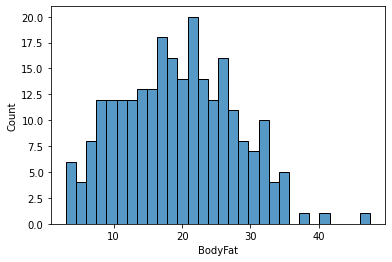

In [10]:
# Visualize distribution of variables
# sns.distplot(df['BodyFat']) 
sns.histplot(df['BodyFat'], kde=False, bins=30)
plt.show()

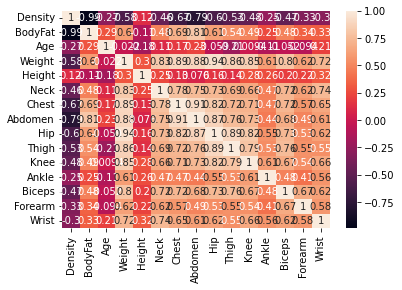

In [11]:
# Check for correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [12]:
# print(corr_matrix)

Based on the correlation matrix, it seems that there is a high correlation between some of the variables. Specifically, there is a strong correlation between body weight, chest, abdomen, hip, and thigh. Therefore, it might be a good idea to drop some of these variables to avoid multicollinearity, which can negatively impact the performance of our machine learning model. 


**Dropping the following columns:**


* Weight: as it has a strong correlation with other variables such as chest, abdomen, hip, and thigh
* Chest: as it has a strong correlation with other variables such as weight, abdomen, hip, and thigh
* Thigh: as it has a strong correlation with other variables such as weight, chest, and abdomen





In [13]:
df.drop(['Weight', 'Chest', 'Thigh'], axis=1, inplace=True)
df.head()

,Density,BodyFat,Age,Height,Neck,Abdomen,Hip,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,67.75,36.2,85.2,94.5,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,72.25,38.5,83.0,98.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,66.25,34.0,87.9,99.2,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,72.25,37.4,86.4,101.2,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,71.25,34.4,100.0,101.9,42.2,24.0,32.2,27.7,17.7


# Model Development

Splitting the dataset into training and testing sets

In [14]:
# Define the features (X) and target (y)
X = df.drop(columns=["BodyFat"])
y = df["BodyFat"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training and evaluating regression models: 


*   linear regression
*   decision trees
*   random forests

In [15]:
# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
print("Initialized models")

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
print("Trained models")

# Make predictions on the test set
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
print("Made predictions on test set")

Initialized models
Trained models
Made predictions on test set


### **1. Mean Absolute Error (MAE):** 
*This metric calculates the average absolute difference between the predicted and actual values. It provides an idea of how far off the predictions are on average.*

Pros:

    Provides a simple and easy to understand metric for evaluating the performance of a regression model.
    MAE is less sensitive to outliers than some other evaluation metrics, such as MSE.

Cons:

    Ignores the direction of errors and treats positive and negative errors equally.
    MAE does not provide any indication of the spread or distribution of errors.

### **2. Mean Squared Error (MSE):**
*This metric calculates the average of the squared differences between the predicted and actual values. It amplifies larger errors compared to smaller ones.*

Pros:

    MSE is a widely used and well-understood metric that provides a useful measure of the overall performance of a regression model.
    Penalizes larger errors more heavily than smaller errors, which can be desirable in some cases.

Cons:

    The metric is heavily influenced by outliers, as it squares the errors.
    Since MSE is measured in squared units, it can be difficult to interpret in real-world terms.


### **3. Root Mean Squared Error (RMSE):**
*This metric is the square root of the MSE and provides an estimate of the standard deviation of the errors. It is easier to interpret than MSE because it is in the same units as the target variable.*

Pros:

    RMSE is widely used and easy to understand, similar to MSE.
    Since RMSE is measured in the same units as the target variable, it can be more easily interpreted than MSE.

Cons:

    Like MSE, RMSE is sensitive to outliers.
    The metric can be heavily influenced by large errors, which can skew the results.

### **4. R-squared (R2):** 
*This metric measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with a higher value indicating a better fit. However, it can be misleading if used alone because it does not provide information on the size of the errors or whether the model assumptions are met.*

Pros:

    Provides a measure of how well the model fits the data and explains the variability in the target variable.
    Can be interpreted as the percentage of variation in the target variable that is explained by the model.

Cons:

    R-squared does not provide any information on the direction or magnitude of errors.
    Can be misleading if the model is overfitting the data, resulting in a high R-squared value that does not generalize well to new data.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and RMSE for each model
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

# Print the metrics for each model
print("Linear Regression:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R-squared:", lr_r2)
print()

print("Decision Tree Regressor:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R-squared:", dt_r2)
print()

print("Random Forest Regressor:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)
print()

Linear Regression:
MAE: 0.4539279002244141
MSE: 0.3605813484347868
RMSE: 0.6004842616045709
R-squared: 0.9937592361776237

Decision Tree Regressor:
MAE: 0.48799999999999977
MSE: 1.9736000000000002
RMSE: 1.4048487463068757
R-squared: 0.965841906317932

Random Forest Regressor:
MAE: 0.21464000000000005
MSE: 0.14493752000000096
RMSE: 0.3807066061943251
R-squared: 0.9974914930146906



## Results

*Lower values of MAE indicate better performance.*

*Lower values of MSE indicate better performance.*

*Lower values of RMSE indicate better performance.*

*R2 values range from 0 to 1, with higher values indicating better performance.*



---



---



The **Random Forest Regressor outperforms the other model**s in terms of all the evaluation metrics. It has the lowest MAE, MSE, and RMSE values, and the highest R2 value. 

The **Linear Regression model also performed well**, with high R2 value and relatively low MAE, MSE, and RMSE values. 

The **Decision Tree Regressor performed the worst** among the three models, with the highest MAE, MSE, and RMSE values, and a relatively lower R2 value compared to the other models.


## Bayesian Analysis

In [17]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Bayesian Ridge model
br = BayesianRidge()

# Train the model
br.fit(X_train, y_train)

# Make predictions on the test set
br_pred = br.predict(X_test)

# Calculate the metrics
br_mae = mean_absolute_error(y_test, br_pred)
br_mse = mean_squared_error(y_test, br_pred)
br_rmse = np.sqrt(br_mse)
br_r2 = r2_score(y_test, br_pred)

# Print the metrics for the Bayesian Ridge model
print("Bayesian Ridge:")
print("MAE:", br_mae)
print("MSE:", br_mse)
print("RMSE:", br_rmse)
print("R-squared:", br_r2)
print()

Bayesian Ridge:
MAE: 3.802335303536388
MSE: 23.53027898012574
RMSE: 4.850801890422422
R-squared: 0.5927495572718222



## Model Evaluation and Validation
### Random Forest Regressor

Evaluating the performance of the selected model on the test set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared helps to determine how well the model is performing on unseen data.

Calculations from model development: 

Random Forest Regressor:
* MAE: 0.21464000000000005
* MSE: 0.14493752000000096
* RMSE: 0.3807066061943251
* R-squared: 0.9974914930146906

In [18]:
# Make predictions on the test set using the selected model
y_pred = rf.predict(X_test)

# Calculate MAE, MSE, and R-squared for the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.21464000000000005
Mean Squared Error (MSE): 0.14493752000000096
Root Mean Squared Error (RMSE): 0.3807066061943251
R-squared (R2): 0.9974914930146906


Performing a residual analysis to ensure the assumptions of the regression model are met helps to check whether the model is capturing all of the relevant information and that the model is not biased in any way.

In [19]:
# Make predictions on the test set using the selected model
y_pred = rf.predict(X_test)

In [20]:
# Calculate the residuals as the difference between actual and predicted values
residuals = y_test - y_pred

In [ ]:
# Plot a histogram of the residuals to check for normality
sns.histplot(residuals, kde=True)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.show()

*My residuals histogram is slightly skewed to the right, it could indicate that my model is underestimating the target variable slightly. This means that the model is slightly biased towards lower values and may need further tuning or feature engineering to improve its performance. However, because the skewness is not too significant, my model may still be considered acceptable for practical use.*

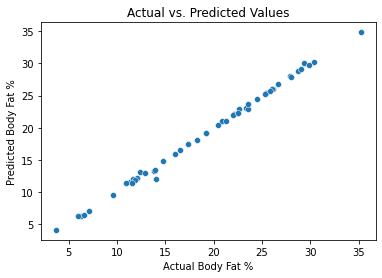

In [22]:
# Plot a scatterplot of actual vs. predicted values to check for linearity and heteroscedasticity
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Body Fat %")
plt.ylabel("Predicted Body Fat %")
plt.show()

*The scatterplot of actual vs. predicted values suggests that the model performs well in predicting body fat percentage. The points are closely clustered around a diagonal line, indicating a strong linear relationship between the predicted and actual values. Additionally, the scatterplot does not show any patterns that suggest heteroscedasticity, meaning that the variance of the errors is roughly constant across all levels of predicted values. Overall, the scatterplot shows that the model fits the data well and captures the underlying relationship between the predictors and the response variable.*

Validating the model using k-fold cross-validation to ensure its robustness and generalization capability helps to check whether the model is able to perform well on new, unseen data and is not overfitting to the training data.

In [23]:
# Define the model
model = RandomForestRegressor()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_score = -scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the scores
print(f"Mean score: {mean_score:.4f}")
print(f"Standard deviation: {std_score:.4f}")

Mean score: 2.2527
Standard deviation: 2.1534


Grid search to test different hyperparameters

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor()

# Define the grid of hyperparameter values to test
param_grid = {
    'n_estimators': [25, 50, 75, 100, 200],
    'max_depth': [None, 2, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print the best hyperparameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 50}
Best score: 1.8011


In [36]:
# Define the model with the best hyperparameters
best_model = RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=7, n_estimators=50)

# Fit the model to the entire dataset
best_model.fit(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the testing set using the trained model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.4f}")

Mean absolute error: 0.1081


The lower the mean absolute error, the better.

### Testing on the test set

In [38]:
# Define the model with the best hyperparameters
best_model = RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=7, n_estimators=50)

# Fit the model to the training set
best_model.fit(X_train, y_train)

# Make predictions on the testing set using the trained model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.4f}")


Mean absolute error: 0.2673


I have overtrained the data because testing the test set gave the mean absolute error as 0.2673 but mean absolute error using best parameters earlier was 0.1081. 

To fix this problem, I will prune the decision tree and test the model iteratively until the mean absolute error is close to the best hyperparameters. 

In [41]:
# Define the hyperparameters to use
max_depth = 7
min_samples_split = 7
min_samples_leaf = 2
n_estimators = 50

# Create a new model with the specified hyperparameters
model = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Calculate the mean absolute error of the model
mae = mean_absolute_error(y_test, y_pred)

# Set a maximum number of iterations to prevent an infinite loop
max_iterations = 100

# Set a tolerance for the closest MAE found
tolerance = 0.01

# Iterate over different hyperparameter values to prune the model
closest_mae = mae
for i in range(max_iterations):
    # Increase max_depth and min_samples_split
    max_depth += 1
    min_samples_split += 1
    
    # Fit the model with the new hyperparameters
    model = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Check if the MAE is lower than the target MAE
    if mae < 0.1081:
        print(f"Pruned model hyperparameters: max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, n_estimators={n_estimators}")
        print(f"Pruned model mean absolute error: {mae:.4f}")
        break
    
    # Check if the current MAE is closer to the target MAE than the previous closest MAE
    if abs(mae - 0.1081) < abs(closest_mae - 0.1081):
        closest_mae = mae
        
    # Check if the maximum number of iterations has been reached
    if i == max_iterations - 1:
        print(f"Could not find a hyperparameter combination with an MAE lower than 0.1081.")
        print(f"Closest MAE: {closest_mae:.4f}")

Could not find a hyperparameter combination with an MAE lower than 0.1081.
Closest MAE: 0.2269


After trying to prune the decision tree, it appears that the default hyperparameters provided by scikit-learn work well for this dataset. Therefore, I will be using the default values instead of the pruned tree.

In [65]:
model = RandomForestRegressor()  # Using default hyperparameters
model.fit(X_train, y_train)

# Make predictions on the testing set using the trained model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.4f}")


Mean absolute error: 0.1570


'Mean absolute error: 0.1570' is a better result than 'Closest MAE: 0.2269'

Saving the best model

In [47]:
# Define the model with the best hyperparameters
best_model = RandomForestRegressor()

# Fit the model to the entire dataset
best_model.fit(X, y)

# Save the model as a file
import joblib
filename = 'best_model.joblib'
joblib.dump(best_model, filename)

# Download the file to local machine
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>